## Project Phase II
INFO 2950 <br>
17 March 2021 <br>
Ava Chen (ac2572), Lauren Crosbie-Walsh (lmc348), Elita Gao (eg556), Kate Hofer (klh253)

### Primary Research Questions: 
- **What is the correlation between ingredients in skincare products and the prices or ratings of the product? In particular, are product prices influenced more so by name value of brands or the quality of ingredients? Are expensive products worth the cost?  **
- **What trends do we see in terms of ingredients between skincare products and can we use our data to recommend specific products and different customers who may be looking for best value products, best overall product, or best product for specific categories?**


**To answer these questions, we will be exploring the relationships between the price, average ratings, ingredients, product categories, brand and skin type fit.**  

### DATASET 1: Data Description
- Dataset 1 was created by Hafidah Mustha’anah and uploaded to Kaggle 6 months ago. The dataset is titled SkinCare Review, and contains products listed on the website Female Daily Review.  
- The data contains the products that were uploaded to the review site on or before 18 September 2020.
- Each observation corresponds to a skincare product item. The columns are attributes about the products. This includes the price, category, product name, and overall rating of the product. Each row corresponds to one product  listed on the site. 
- When creating this data set, only products that were listed on or before September 18, 2020 would have been included in the data set. Any products listed on Female Daily Review after this date would not be included in the dataset. 
- This data was web scraped from the website by the person who uploaded the data set, Hafidah Mustha’anah. This person may have chosen to include or exclude some products on the site. Therefore, it is possible that the dataset does NOT include all instances of products listed on Female Daily Review.
- It is also unclear what process/method she used to data scrape. During the process of web scraping, the creator of the dataset may have chosen not to include some pieces of data about each product, or may have chosen not to include some products listed on the website. 
- The relationships between individual instances are made explicit by the category. Products are related to one another if they are in the same category, for example products that are listed in the category column as ‘Face Mist’
- It is also unclear to us why the creator of this dataset, Hafidah Mustha’anah, decided to web scrape this data from the Female Daily Review website. It also remains unclear whether this data has been used for any other purposes.
- Since the data was data scraped by another person, I do not have access to the raw data. However, it can be found on this website: https://reviews.femaledaily.com/


### DATASET 2: Data Description
- Dataset 2 was created by Jiwon Jeong (GitHub user jjone36) for a Cosmetic Recommendation System on November 28, 2018. Here is the article that describes her scraping and analysis process: https://towardsdatascience.com/for-your-skin-beauty-mapping-cosmetic-items-with-bokeh-af7523ca68e5.
- Observations: skincare product items. Attributes include its price, brand, rank, ingredients, and for what skin type for whom the product would be most useful. Each row corresponds to one product.
- Since it is difficult to choose what cosmetic items fit for different skin types, the creator decided to build a simple cosmetic recommendation system.
- It is unclear who funded the creation of the dataset. Since the dataset does not involve experimental data but rather observational data, it is possible that no funding was required.
- The skincare products may not be representative of all brands because the creator only used data from Sephora and not only cosmetic stores. Because of this, prices may also not be the original prices from the brands themselves but marked by Sephora. In addition, it is possible that these products have changed from 2018 to now.
- The dataset that we are using is the original dataset that the creator had not preprocessed. We wanted to start from scratch for more data-cleaning practice and learning. In addition, our research question differs from the creator’s. Rather than re-building the cosmetic recommendation system that she had built, we instead are examining any correlations between the rank and price of cosmetic items between different brands and for different skin types.
- The people involved in data collection contributed to the 'rank' column for their average reviews.
- Our raw source data can be found in our Colab Notebooks Google Drive, titled <cosmetic.csv>: https://drive.google.com/drive/folders/1br0b-r_qFnh-bNIY8xPsmC8a4Pw-ulZX?usp=sharing. Alternatively, it can also be found on the creator’s GitHub.


### Data Limitations
- Since it was web scraped by someone else, the creators of the data set could have excluded some data instances or columns. This could lead to an inaccurate analysis
- For data set 1, some of the prices are $0. It is unclear if this was a typo or if there is just no price data for that instance 
- For data set 2, some of the instances have 2 values in the ‘price’ column. Might not be the accurate price; this could signify discount etc. but not sure
- Data set 2 is also not representative of all cosmetics, but just Sephora. For instance, Sephora does not carry drugstore products but only the more high-end products.
- Data set 2's 'rank' column may be skewed because it is an aggregate of reviews. So while a product may receive mostly 5s, a few 1s may cause the mean rank to go down to a 4. We do not know the distributions of the reviews for each product as a result.
- The second dataset is from 2018, so prices and product variety may have changed or have been discontinued since then.
- Might not be possible to make generalizations and/or recommendations, since both data sets contain a small sample of all skincare products sold 
- Not every customer writes reviews, so the reviews may be generally biased toward consumers who either really liked or disliked the product.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')



***
## Dataset 1

Imported raw data, "00. InfoProduct.csv", into notebook. Data downloaded from Kaggle.com.

In [2]:
raw1 = pd.read_csv("00. InfoProduct.csv")

The following cell cleans the `raw1` data. 
1. We drop the 'Reviewer' column as the identifier for each reviewer is not relevant for our data analysis.
2. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
3. We changed the 'Price' column's currency from Indonesian Rupiah (RP) to USD. We do this by finding the exchange rate and muliplying that rate by every row in that column. 
4. Renamed 'merk' column to 'brand' since merk in Indonesian translates to brand in English, and renamed 'overallrating' to 'rating'

In [3]:
# 1. Drop "Reviewer" column
raw1=raw1.drop(['Reviewer'], axis=1)

# 2. lowercase column titles
new_colnames = [i.lower() for i in raw1.columns]
raw1=raw1.copy()
raw1.columns=new_colnames

# 3. Price: Rp --> USD
raw1['price'] = raw1['price'].str.replace('Rp.', '')
raw1['price'] = raw1['price'].str.replace('.','')
raw1['price'] = raw1['price'].astype(float)
raw1["price"] = 0.00007 * raw1["price"]

# 4. rename merk --> brand, overallrating --> rating
raw1 = raw1.rename(columns = {"merk" : "brand"})
raw1 = raw1.rename(columns = {"overallrating" : "rating"})
raw1.head()

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In the next cell we find the average ratings grouped by brand. 

In [4]:
#groupby avg rating by brand
brands_group=raw1.groupby('brand')['rating'].mean()
print(brands_group)


brand
APIEU                  3.800000
APOTCARE               3.766667
AVOSKIN                4.233333
Acnes                  3.511111
Acnol                  4.000000
Argania Organics       4.000000
Ariul                  4.175000
Avene                  4.400000
Azarine Cosmetics      4.640000
Aztec Secret           4.200000
BHUMI                  4.600000
Bali Alus              3.200000
Banila Co              4.350000
Beleaf                 4.100000
Benton                 4.000000
Benzolac               3.600000
Bio-Essence            4.200000
Bioaqua                3.400000
Bioderma               4.150000
Biokos                 4.800000
Biore                  4.036842
Biotalk.id             3.800000
Boscia                 3.600000
Botanicabeauty.id      3.900000
Breylee                4.600000
Brunbrun Paris         2.750000
CURE                   4.300000
Caladine               3.400000
Catrice                3.900000
Celebon                3.780000
                         ...   
St

Now, we create a scatter plot to look at the relationship between rating and price of a product. We notice 2 distinct outliers (one around price= 3,600 and one around price=4,600) that makes our scatter plot not very useful in showing the relationship of interest. We fix this in the next cell.

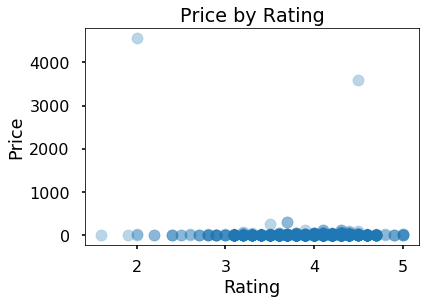

In [52]:
plt.scatter(x=raw1['rating'],y=raw1["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

We want to look at low-priced and drugstore skin products since the average customer would be interested in better understanding this subset of products. This would also help our scatter plot be more informative since we are taking out the outliers. We use the next print statement to make sure we are not taking out a large portion of our sample.

In [6]:
print(raw1.loc[raw1.price >=50])

                  category             brand  \
40             Night Cream         Sulwhasoo   
68             Night Cream           Kiehl's   
155               Face Oil      Sunday Riley   
157               Face Oil      Sunday Riley   
173          Eye Treatment           Lancome   
176          Eye Treatment             SK-II   
242         Acne Treatment               OXY   
243         Acne Treatment               OXY   
249        Serum & Essence             SK-II   
264        Serum & Essence           Lancome   
342             Mask Sheet             SK-II   
555      Lotion & Emulsion             SK-II   
569               Face Oil           Kiehl's   
571               Face Oil             NIVEA   
584          Eye Treatment      Estee Lauder   
588          Eye Treatment           Kiehl's   
595          Eye Treatment    Drunk Elephant   
604  Brow & Lash Treatment         RapidLash   
653        Serum & Essence           Kiehl's   
654        Serum & Essence      Estee La

Now, we make a new dataframe `skincare_subset` that has keeps only the subset of products that cost 50 USD or less. Next, we redid the scatter plot with the new subset. Ratings are skewed toward the right, and higher ratings do not indicate higher prices, but the products with higher prices generally land in the 4-rating range, with an outlier with the rating of 2.

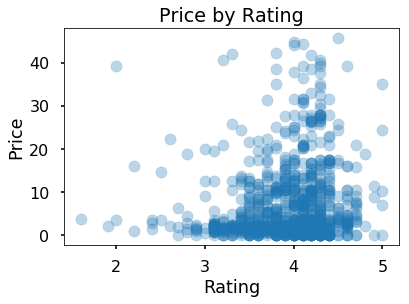

In [7]:
skincare_subset=raw1.loc[(raw1['price']<=50)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

We looked at the unique categories of skin products that we had in our dataset and realized some of them were not for the skin. The next few cells create a new dataframe `skincare_subset2` that removes the following categories from our dataset: 'Eye Treatment', 'Brow & Lash Treatment', 'Peeling', 'Nose Pack', and 'Wash-Off'

In [8]:
#look at unique categories
print(skincare_subset.category.unique() )

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Eye Treatment' 'Brow & Lash Treatment'
 'Skin Soothing Treatment' 'Acne Treatment' 'Serum & Essence' 'Peeling'
 'Sleeping Mask' 'Mask Sheet' 'Nose Pack' 'Wash-Off' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


In [9]:
#new subset with only face-specific categories
skincare_subset2=skincare_subset.loc[(skincare_subset['category']!= 'Eye Treatment') & (skincare_subset['category']!='Brow & Lash Treatment')& (skincare_subset['category']!='Peeling')& (skincare_subset['category']!='Nose Pack')& (skincare_subset['category']!='Wash-Off')]

In [10]:
#Confirm that categories were removed
print(skincare_subset2.category.unique())

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Skin Soothing Treatment' 'Acne Treatment'
 'Serum & Essence' 'Sleeping Mask' 'Mask Sheet' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


We check the number of product entries that are $0 in the 'price' column within skincare_subset2:

In [11]:
print(len(skincare_subset2.loc[(skincare_subset2['price']==0)])) #number of 0s in 'price'

39


As you can see, there are 39 product entries that are $0, making the data skewed toward the left. <br>Here we remove prices that are 0 so that the data is not left-skewed:

In [12]:
#Remove Prices that are $0
price_subset = skincare_subset2.copy()
price_subset=price_subset.loc[(price_subset['price']!=0)]

We redid the scatter plot with the price_subset. Not much looks different from the previous scatter plot before we removed the 0s.

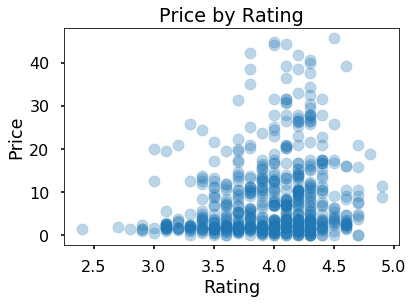

In [13]:
plt.scatter(x=price_subset['rating'],y=price_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

This box plot looks at price by category. Most of the data is left-skewed with some tails toward the higher prices such as Emulsion and Oil. Oil and Sleeping Mask are generally higher with higher median prices. Mask Sheet has a small distribution of prices.

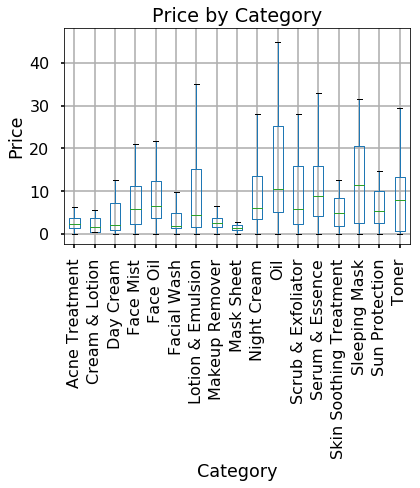

In [14]:
#Price by Category
plot=skincare_subset2.boxplot('price', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')
plt.show()

This box plot looks at rating by category. All of the categories have median ratings either directly above or below 4.0. Mask sheet has the highest median while Day Cream has the lowest. There are no significant outliers.

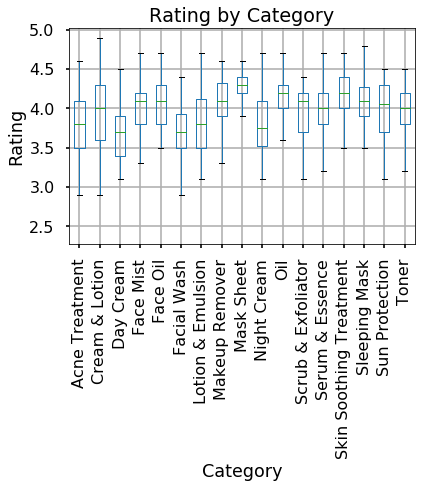

In [15]:
#Rating by Category
plot=skincare_subset2.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()

Here the summary statistics of our cleaned data:

In [16]:
price_subset.describe()

,price,rating
count,613.000000,613.000000
mean,8.236146,3.954323
std,9.117507,0.406847
min,0.000700,2.400000
25%,1.890000,3.700000
50%,4.200000,4.000000
75%,11.340000,4.200000
max,45.850000,4.900000


These are the average ratings by category:

In [17]:
skincare_subset2.groupby(['category'])['rating'].mean()

category
Acne Treatment             3.770270
Cream & Lotion             3.910811
Day Cream                  3.660000
Face Mist                  3.992308
Face Oil                   4.068571
Facial Wash                3.687500
Lotion & Emulsion          3.790000
Makeup Remover             4.060000
Mask Sheet                 4.220513
Night Cream                3.828947
Oil                        4.131579
Scrub & Exfoliator         3.934211
Serum & Essence            3.969444
Skin Soothing Treatment    4.157500
Sleeping Mask              4.086842
Sun Protection             3.986842
Toner                      3.933333
Name: rating, dtype: float64

These are the average prices per category:

In [18]:
price_subset.groupby(['category'])['price'].mean()

category
Acne Treatment              5.015860
Cream & Lotion              4.035027
Day Cream                   8.295039
Face Mist                   7.748844
Face Oil                   11.250945
Facial Wash                 4.755306
Lotion & Emulsion           9.310190
Makeup Remover              4.397256
Mask Sheet                  1.671895
Night Cream                 9.141563
Oil                        14.644674
Scrub & Exfoliator         10.451142
Serum & Essence            14.310333
Skin Soothing Treatment     5.761009
Sleeping Mask              13.041328
Sun Protection              8.294960
Toner                      10.155742
Name: price, dtype: float64

These are the average ratings by brand:

In [19]:
skincare_subset2.groupby(['brand'])['rating'].mean()

brand
APIEU                  3.800000
AVOSKIN                4.233333
Acnes                  3.462500
Acnol                  4.000000
Ariul                  4.175000
Avene                  4.400000
Azarine Cosmetics      4.600000
BHUMI                  4.600000
Banila Co              4.350000
Benton                 4.000000
Benzolac               3.600000
Bio-Essence            4.200000
Bioderma               4.150000
Biokos                 4.900000
Biore                  4.325000
Boscia                 3.600000
Botanicabeauty.id      3.900000
CURE                   4.300000
Caladine               3.400000
Celebon                4.033333
CeraVe                 4.300000
Cetaphil               3.800000
Charis                 3.700000
Citra                  3.740000
Clean And Clear        3.342857
Clinelle               3.900000
Clinique               4.000000
Corine de Farme        3.650000
Cosrx                  4.000000
DHC                    4.300000
                         ...   
Se

These are the average prices by brand:

In [20]:
price_subset.groupby(['brand'])['price'].mean()

brand
AVOSKIN                15.796667
Acnes                   2.003750
Acnol                   1.050000
Ariul                   1.050000
Avene                  13.930000
Azarine Cosmetics       3.587500
BHUMI                  16.030000
Banila Co              17.500000
Benton                 14.780000
Benzolac                1.645000
Bio-Essence             8.890000
Bioderma               14.612500
Biokos                 11.340000
Biore                   6.493455
Boscia                 10.500000
Botanicabeauty.id       3.500000
CURE                   37.745610
Caladine                1.260000
Celebon                 5.390000
CeraVe                  0.104650
Cetaphil                8.986367
Charis                 16.940000
Citra                   1.879500
Clean And Clear         1.166783
Clinelle               11.130000
Clinique               26.375272
Corine de Farme        13.475000
Cosrx                  12.209531
DHC                    25.900000
Dear Me Beauty         10.430000
    

***
## Dataset 2

Imported second raw dataset, "cosmetic.csv", into notebook. Data downloaded from GitHub.

In [21]:
raw2 = pd.read_csv("cosmetic.csv")
raw2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\r\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


The following cell cleans the `raw2` data. 
1. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
2. We drop the 'url' column as the url for each product is not relevant for our data analysis.
3. To make it easier to read, we kept only the first word before the hyphen in the "Label" column. For example, "moisturizing-cream-oils-mists" is now just "moisturizing". 

We copied `raw2` and set it equal to a new dataframe titled `skin`.

In [22]:
# 1. Lowercase column names
col_lower = [i.lower() for i in raw2.columns]
raw2=raw2.copy()
raw2.columns=col_lower

In [23]:
raw2.head()

,label,url,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\r\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [24]:
# 2. Drop url column
raw2=raw2.drop(['url'], axis=1)

In [25]:
# 3. Keep word before hyphen in 'label' column
liste = [i.split("-",1)[0] for i in raw2.label]
skin = raw2.copy()
skin['label'] = liste 

skin.head()



,label,brand,name,price,rank,skin_type,ingredients
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\r\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


Next, we wanted to simplify the "skin_type" column information. To do this we took each unique skin type and made a new column for each one. For each product in the dataset, if the product's 'skin_type' column specifies a certain skin type, that skin type's column changes to 1. If not, it stays at 0 (each skin type column is its own dummy variable). 

For example, the Crème de la Mer (row 0) says it's for Normal, Oily, Combination, Dry, and Sensitive types of skin. So each of those skin type columns will be filled with a 1 instead of the default 0. 

To do this we did the following steps:
1. Found unique skin types and manually created a list of them tiled `unique_skin_list`
2. Looped though `unique_skin_list` and added a new column of zeros to `skin` dataframe for each string in the list.
3. Made all entries within "skin_type" column strings (becuase some were floats from the original dataset)
4. Loop through each product's "skin_type" column. For each product, we looked to see if a skin type from `unique_skin_list` was in that product's "skin_type" column. If it was, we set the corresponding column =1. If it wasn't, we left it =0. 


In [26]:
# 1. Find unique skin types and create list of them
print(skin.skin_type.unique())
unique_skin_list = ['Normal','Oily', 'Combination', 'Dry', 'Sensitive', 'Full', 'Natural', 'Matte', 'Light', 'Radiant']

["['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Natural\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Sensitive\\n']" '[]'
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Normal\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Normal\\n', '✔ Dry\\n']" "['✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Oily\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Full\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Medium\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Radiant\\n']"
 "

In [27]:
# 2. Loop through list and add a new column of zeros to dataframe for each unqiue skin-type
for x in unique_skin_list:
    skin[x]=0

skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\r\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",0,0,0,0,0,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...,0,0,0,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0,0,0,0,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,0,0,0,0,0,0,0,0,0,0


In [28]:
# 3. make all entries within "skin_type" column strings
skin['skin_type'] = skin['skin_type'].astype(str)

In [29]:
# 4. Loop through product's "skin_type" column and adjust skin type columns accordingly
count=-1
for x in skin['skin_type']:
    count+=1
    for s_type in unique_skin_list:
        if s_type in x:
            skin.loc[count,s_type]=1

            


To make the "price" column of `skin` to look similar to our first dataset's "price" column, we dropped the dollar sign from the column values.

In [30]:
skin['price'] = skin['price'].str.replace('$','')

In [31]:
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00\r\n(214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


Some rows' "price" column show two values (ex: Facial Treatment Essence (Row 2) has "price" = 179.00\n(214.00 value)), so we want to just show the first price. 

To do this we did the following:

1. We looped through the "price" column to find any rows that had a string length greater than 8. We know these rows are the ones that have two values and that we want to change.

2. For those rows identified, we found the first decimal point and then spliced that string 2 indexes past it so that just the first price is kept

In [32]:
# 1) look through "price" to find rows with string length greater than 8. Print value and row number. 
skin['price'] = skin['price'].astype(str)
row=-1
for x in skin['price']:
    row+=1
    if len(x)>8:
        print(x)
        print(row)

179.00
(214.00 value)
1
90.00
(123.00 value)
15
69.00
(106.00 value)
178
68.00
(96.00 value)
185
179.00
(214.00 value)
300
90.00
(123.00 value)
307
16.00 8.00
443
45.00
(66.00 value)
451
7.00
(10.00 value)
454
7.50 4.00
475
7.50 4.00
477
34.00
(63.00 value)
515
39.00 27.00
544
55.00
(69.00 value)
551
28.00 19.00
557
35.00
(45.00 value)
577
179.00
(214.00 value)
600
158.00
(175.00 value)
603
178.00
(210.00 value)
607
88.00
(102.00 value)
608
90.00
(123.00 value)
617
88.00
(102.00 value)
618
28.00
(43.00 value)
620
23.00
(30.00 value)
625
88.00
(102.00 value)
700
68.00
(97.00 value)
733
100.00 59.00
757
169.00
(189.00 value)
759
35.00
(71.00 value)
761
29.00
(67.00 value)
785
90.00 59.00
795
68.00
(72.00 value)
801
55.00
(88.00 value)
803
59.00
(93.00 value)
820
34.00
(63.00 value)
836
84.00
(115.00 value)
843
75.00
(254.00 value)
901
135.00
(170.00 value)
902
36.00
(57.00 value)
904
25.00
(36.00 value)
905
18.00
(24.00 value)
934
169.00
(236.00 value)
957
34.00 22.00
1003
35.00
(45.00 v

In [33]:
# 2) find decimal and splice
step=-1
for x in skin['price']:
    step+=1
    if len(x)>8:
        first_dec=skin.loc[step,'price'].find('.')
        skin.loc[step,'price']= skin.loc[step,'price'][:(first_dec+3)]

            
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \r\n-Pygmy Waterlily...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


We dropped the "skin_type" column now that we made each unique skin type its own column.

In [34]:
skin = skin.drop(['skin_type'], axis = 1)

Next, we lower cased all the columns again (because the new skin type columns were capitalized).

In [35]:
lower_ingredients = [i.lower() for i in skin.columns]
skin=skin.copy()
skin.columns=lower_ingredients

In [36]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \r\n-Pygmy Waterlily...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


Finally, we changed the string in the "price" column back to floats so this column could be utilized in future analyses.

In [37]:
skin['price'] = skin['price'].astype(float)

Here are the summary statistics of our cleaned data:

In [38]:
skin.describe()

,price,rank,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
count,1626.000000,1624.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,55.820381,4.162931,0.654601,0.613497,0.660123,0.614110,0.505521,0.003681,0.003067,0.004294,0.006135,0.002454
std,44.420960,0.610399,0.475644,0.487098,0.473813,0.486954,0.500123,0.060578,0.055317,0.065411,0.078109,0.049492
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here are the average prices of the brands:

In [39]:
skin.groupby(['brand'])['price'].mean()

brand
ALGENIST                          70.133333
AMOREPACIFIC                      97.666667
ANTHONY                           32.000000
APIVITA                           30.000000
BAREMINERALS                      35.833333
BEAUTYBIO                         46.000000
BECCA                             41.333333
BELIF                             39.300000
BIOEFFECT                        171.250000
BIOSSANCE                         57.461538
BLACK UP                          45.000000
BLITHE                            44.000000
BOBBI BROWN                       52.363636
BOSCIA                            25.500000
CANE + AUSTIN                     48.000000
CAUDALIE                          52.151515
CHARLOTTE TILBURY                 60.666667
CLARINS                           57.222222
CLARISONIC                        19.000000
CLINIQUE                          32.697802
COOLA                             36.842105
COVER FX                          38.000000
DERMADOCTOR               

Here is a box plot of the average prices by brand. As you can see, there are over 100 brands. Most of the data is left-skewed with a few brands, such as La Mer and Sk-II that have higher prices and larger distributions.

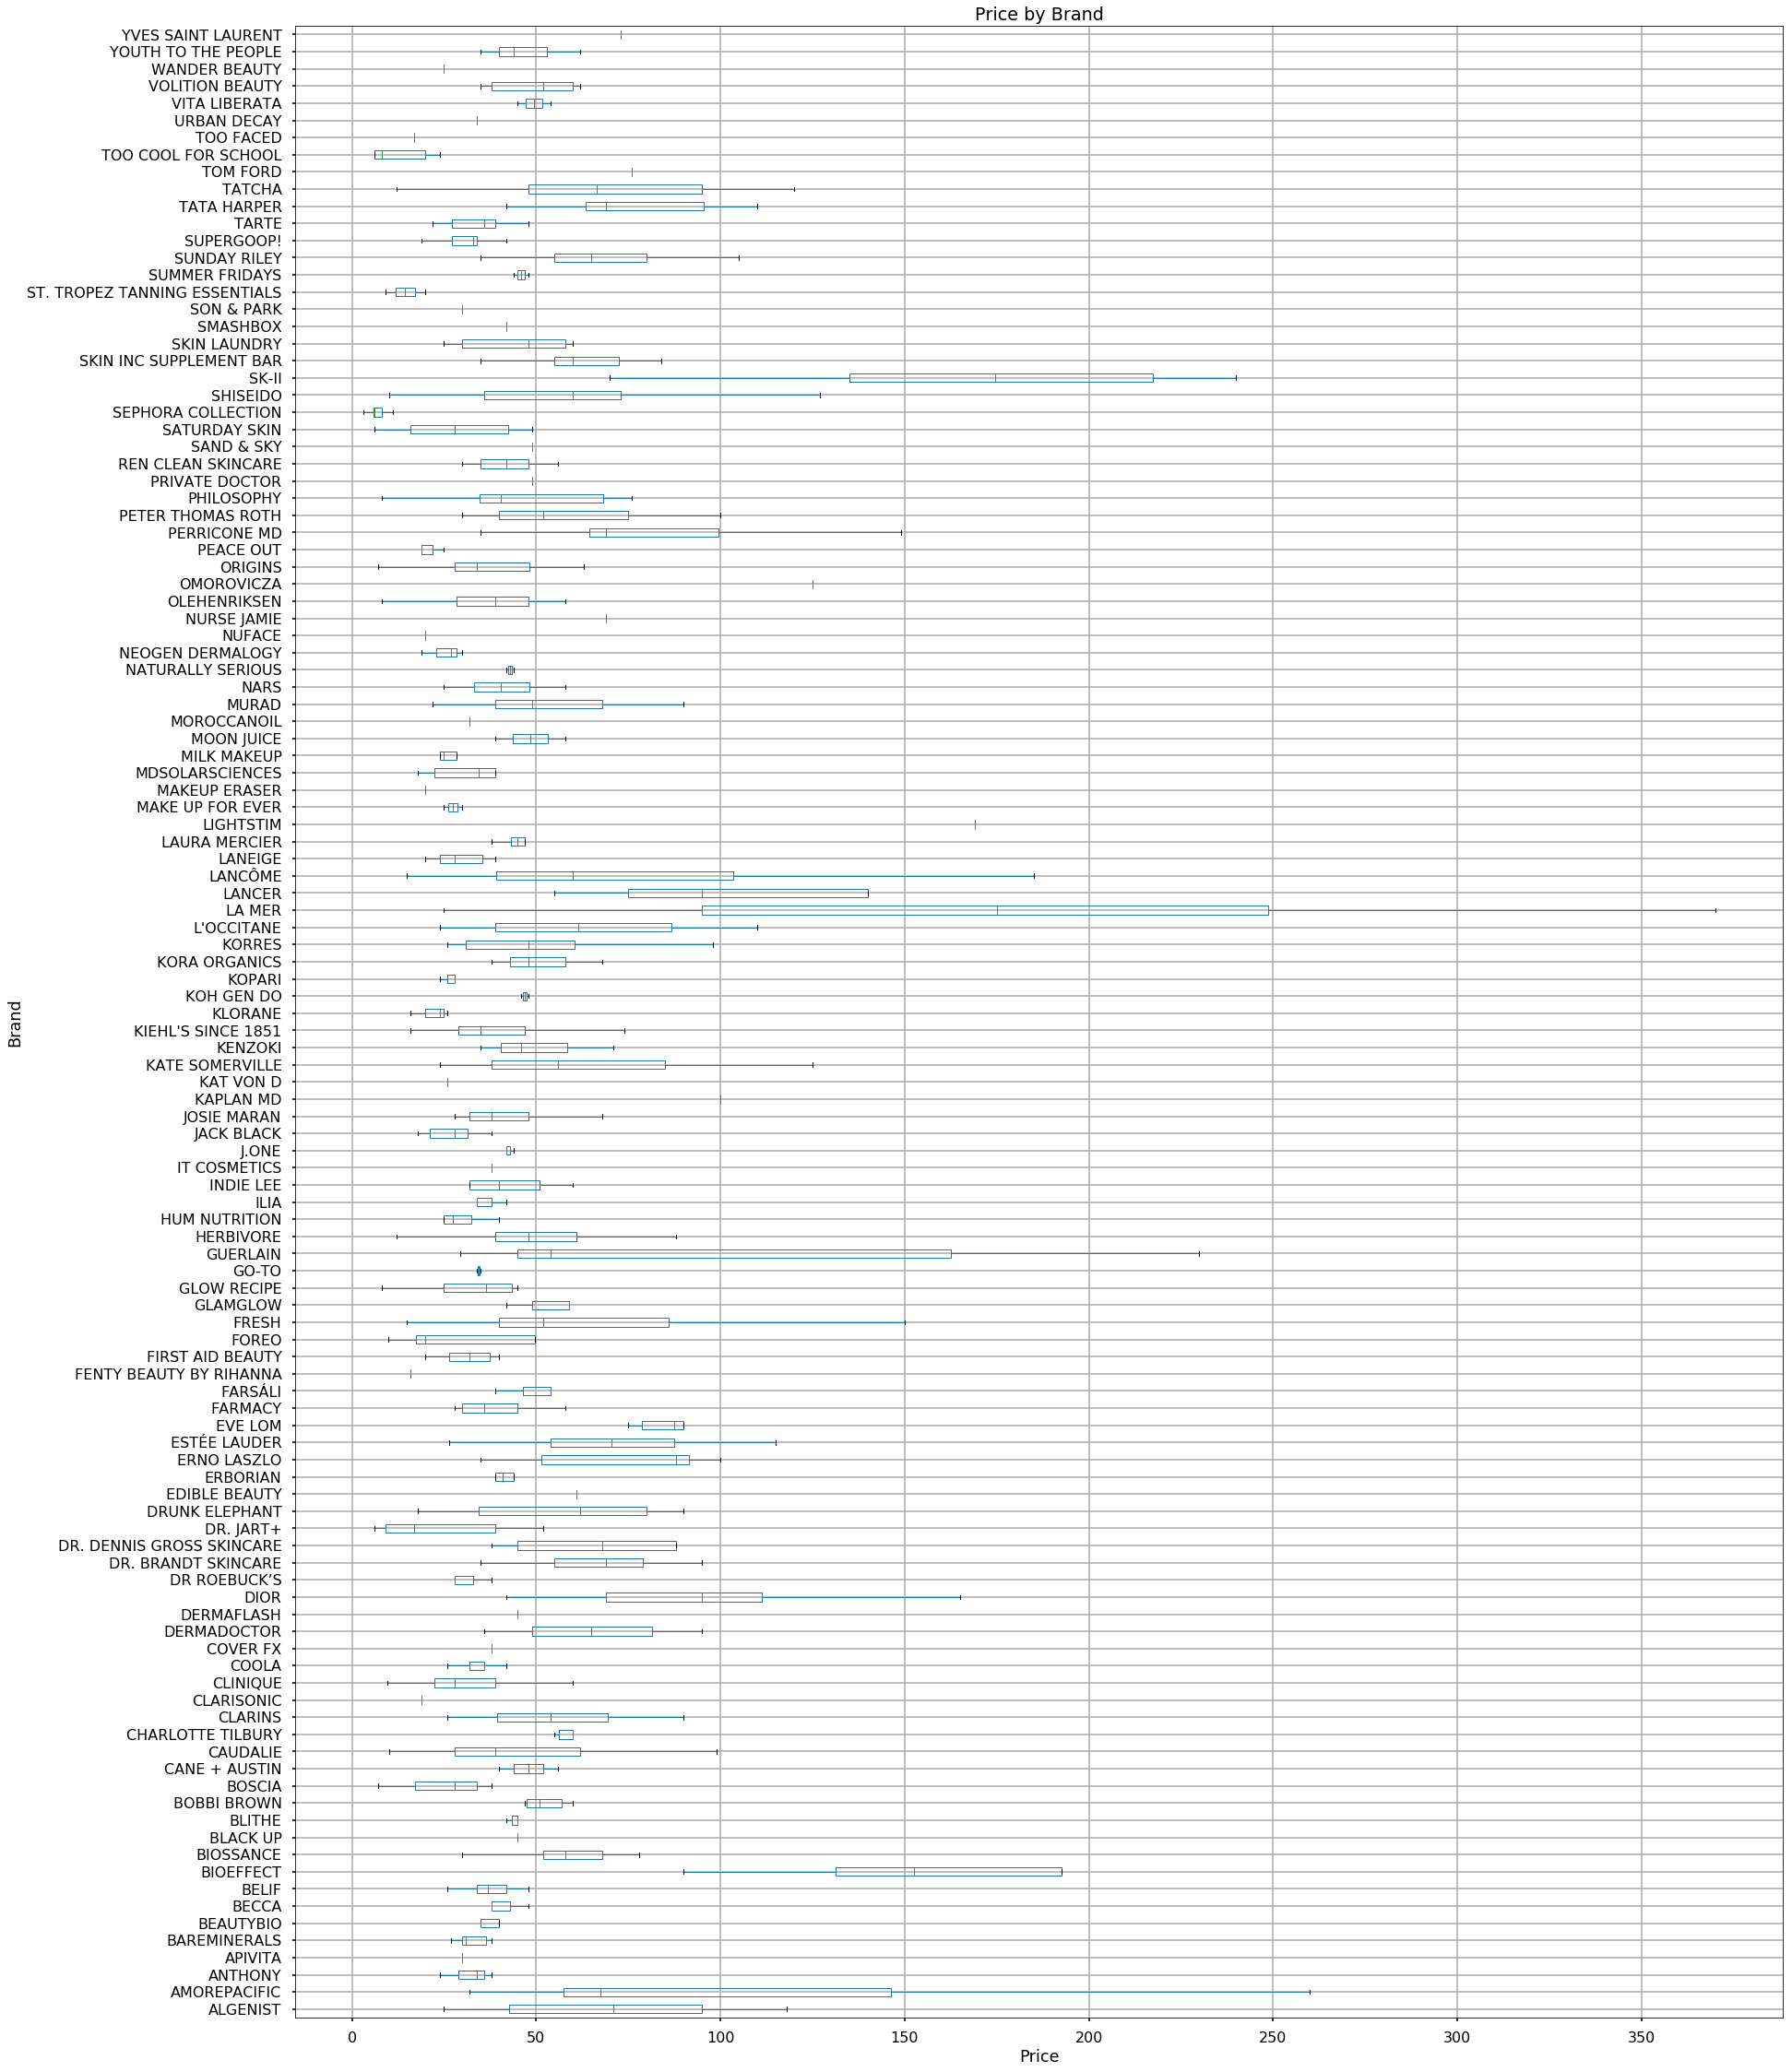

In [53]:
plot=skin.boxplot('price', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Price by Brand')
plt.suptitle('')
plt.show()

Here are the average ranks of the brands:

In [41]:
skin.groupby(['brand'])['rank'].mean()

brand
ALGENIST                         4.023333
AMOREPACIFIC                     4.254167
ANTHONY                          4.233333
APIVITA                          4.000000
BAREMINERALS                     4.116667
BEAUTYBIO                        3.660000
BECCA                            4.066667
BELIF                            4.380000
BIOEFFECT                        4.900000
BIOSSANCE                        4.423077
BLACK UP                         4.700000
BLITHE                           4.433333
BOBBI BROWN                      4.272727
BOSCIA                           3.979167
CANE + AUSTIN                    4.150000
CAUDALIE                         4.187879
CHARLOTTE TILBURY                4.316667
CLARINS                          4.151852
CLARISONIC                       5.000000
CLINIQUE                         4.132967
COOLA                            4.278947
COVER FX                         3.900000
DERMADOCTOR                      4.054545
DERMAFLASH                  

Here is a box plot of the average rank by brand. Most of the data is right-skewed by some brands' rankings are more spread out, such as St. Tropez Tanning Essentials and Foreo. St. Tropez had the lowest rank and Foreo had a long tail but still a generally high rank.

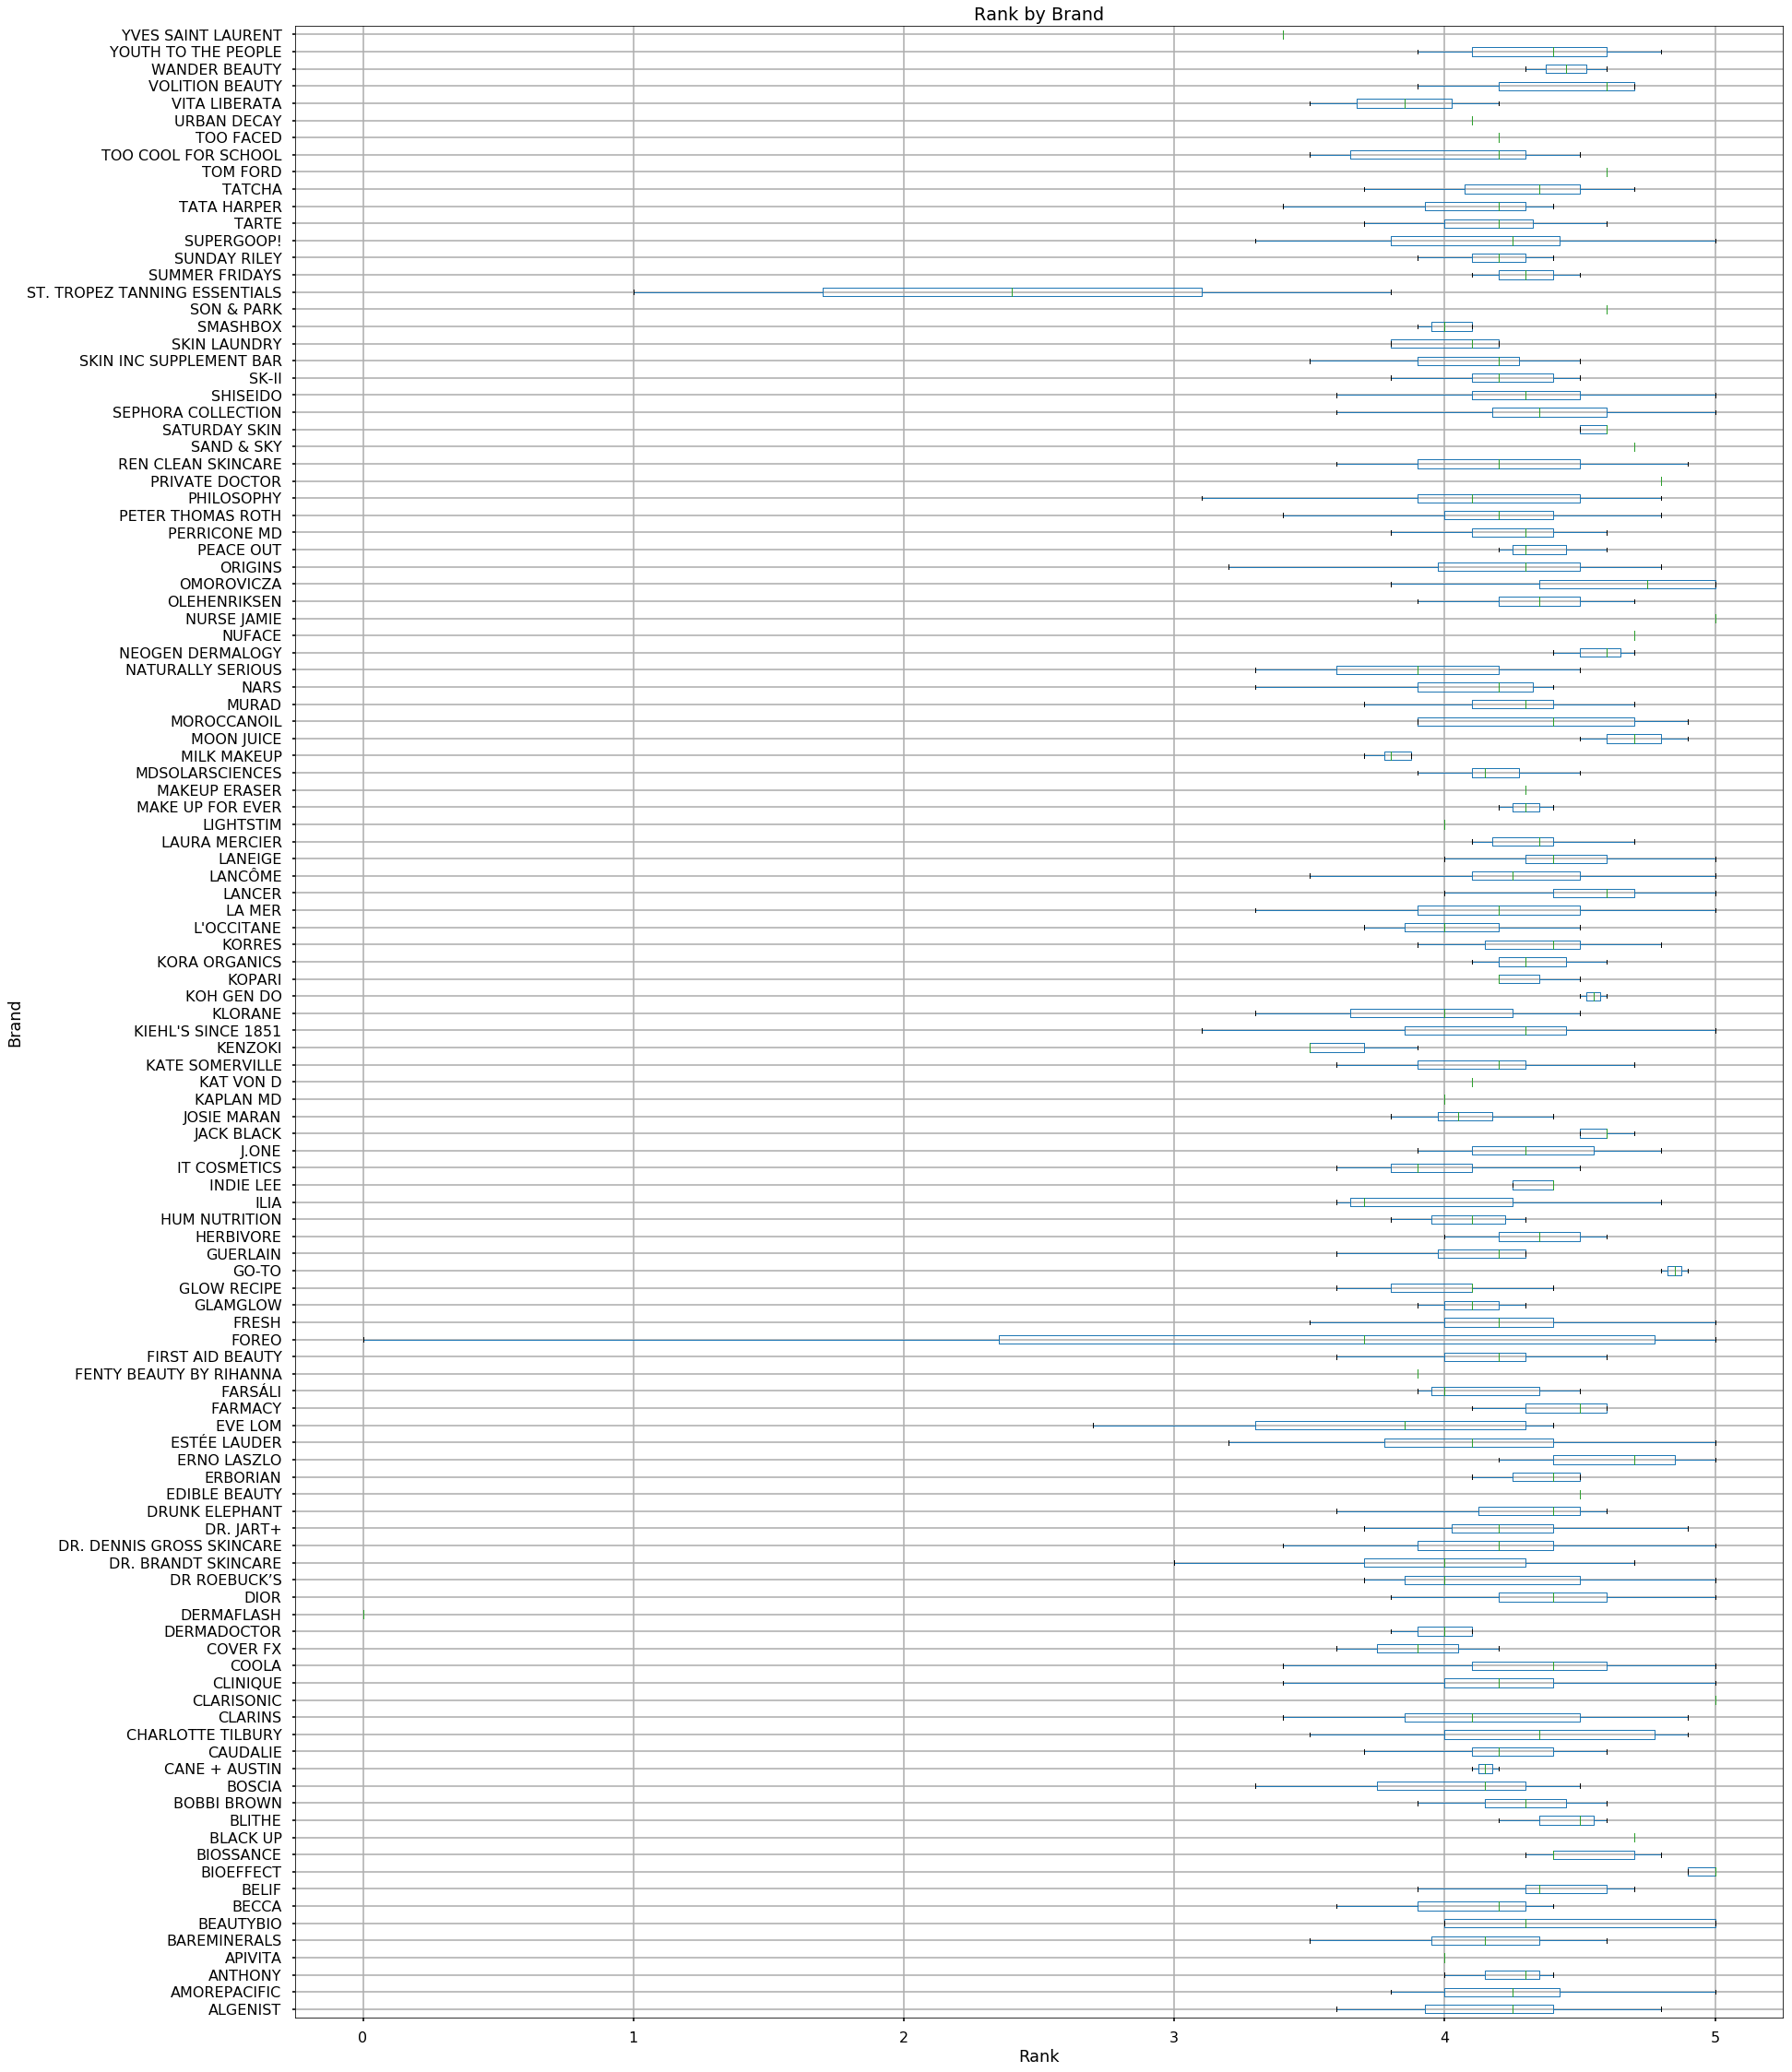

In [50]:
plot=skin.boxplot('rank', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Rank')
plt.ylabel('Brand')
plt.title('Rank by Brand')
plt.suptitle('')
plt.show()

Here are the average rank of different labels:

In [43]:
skin.groupby(['label'])['rank'].mean()

label
cleanser        4.298997
eye             3.817593
face            4.185906
facial          4.217000
moisturizing    4.265772
sunscreen       4.069953
Name: rank, dtype: float64

This is a box plot where we looked at how ranking varies across different labels. The label with the highest median is cleanser, and the label with the lowest median is the eye product. Eye, face, and sunscreen appear to have the largest distributions.

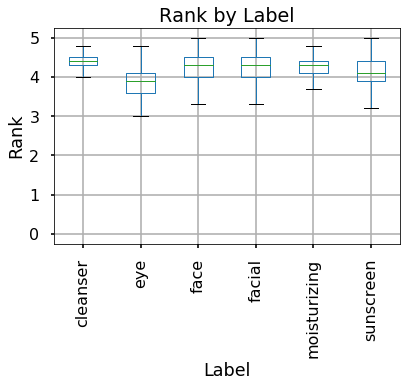

In [48]:
#Rank by Label
skin.boxplot('rank', by='label', rot=90)
plt.xlabel('Label')
plt.ylabel('Rank')
plt.title('Rank by Label')
plt.suptitle('')
plt.show()

Here are the average prices of different labels:

In [45]:
skin.groupby(['label'])['price'].mean()

label
cleanser        34.511706
eye             63.337963
face            43.570268
facial          75.780000
moisturizing    69.548333
sunscreen       47.800469
Name: price, dtype: float64

We created a scatter plot to look at the relationship between ranking and price. Notice how the data is right-skewed. There is a weak correlation between price and rank, showing that prices vary no matter the rank, and that there are generally more rankings above 3.

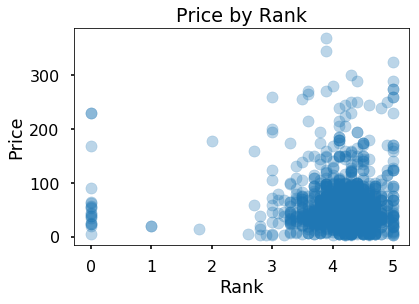

In [49]:
plt.scatter(x=skin['rank'],y=skin["price"], alpha=0.3)
plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Price by Rank')
plt.show()

### Questions for Reviewers:
- How many research questions is ideal? What is the best way to phrase the questions?
    - Have we framed the research questions in an appropriate way?
- Can we continue to find and add datasets as we continue to work on the project to help build our analysis if needed? Or are we limited to the data we have now? 
- In data set 1, we created the price subset to exclude product entries with the price of $0. However, we still need the other data within that row, such as their ratings. Therefore, when calculating our mean ratings and prices, we would use different subsets. Is there a better way to go about subsetting the data so that we only use one subset? Could we convert 0s to NaN and still be able to analyze the other prices as floats?
- In data set 2, the Rank by Label plot does not show the minimum rank of 0, even though there are ranks of 0, as shown in the summary statistics and the Rank by Price plot. Is there a way for us to indicate 0 as either the minimum value or the outlier?